In [ ]:
!pip3 install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=55303460951dd628ad30d4d3e6cb53e36da94edb319e6ea221eb2481d34a0bb9
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip3 install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import langdetect
import re
import unicodedata
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import contractions
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, recall_score, precision_score, accuracy_score,multilabel_confusion_matrix, roc_auc_score
from nltk.corpus import stopwords
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('onw-1.4')
nltk.download('averaged_percepton_tagger')

[nltk_data] Error loading onw-1.4: Package 'onw-1.4' not found in
[nltk_data]     index
[nltk_data] Error loading averaged_percepton_tagger: Package
[nltk_data]     'averaged_percepton_tagger' not found in index


False

#1
##1A

In [ ]:
df = pd.read_csv(R'/content/drive/MyDrive/AI-ML/Natural Language Processing/Mini Project/Data/blogs/blogtext.csv')
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [ ]:
df.shape

(681284, 7)

In [ ]:
df['text'].str.len().max()

790123

##1B

In [ ]:
df['date']=df['date'].str.replace(',','-')
df['date'].value_counts()

02-August-2004     16544
01-August-2004     13261
03-August-2004     11851
05-August-2004      9297
04-August-2004      8661
                   ...  
10-Januar-2004         1
02-enero-2004          1
15-Mai-2004            1
08-enero-2004          1
21-October-2000        1
Name: date, Length: 2616, dtype: int64

In [ ]:
df.shape

(681284, 7)

In [ ]:
df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [ ]:
df2 = df.sample(20000)
df2.head()

,id,gender,age,topic,sign,date,text
458637,3813631,female,17,indUnk,Cancer,14-July-2004,This holidays has turned out to be a bo...
387920,2873403,female,17,Student,Cancer,16-March-2004,"Woot, Its snowing, so we got sent home ..."
246227,1281160,male,24,Technology,Sagittarius,07-March-2003,"Hai Alll, Nice.... This shouldnt g..."
369672,979795,male,26,Technology,Taurus,19-June-2004,Thirty Seven: Even though our path is c...
570901,705633,male,27,Technology,Gemini,28-June-2004,Still chortling about Lord of the T...


#2
##2A,2B,2C,2D

In [ ]:
def string_cleaning(table,col):
    table[col] = table[col].apply(lambda x: re.sub(r'\d+','',x))
    print('removed numbers from text')
    table[col] = table[col].str.replace('[^A-Za-z\s]+', '')
    print('removed special characters')
    table[col] = table[col].str.replace('[^\w\s]+', '')
    print('removed puctuations')
    table[col] = table[col].str.strip()
    print('Additional whitespaces removed')
    print('--------------------------')
    return table[col].head()

In [ ]:
def remove_stopwrds(a):
    for i in a:
        if i in stopwords.words('english'):
            a.pop(a.index(i))
        else:
            pass
    return a
def remove_nonascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD',word).encode('ascii','ignore').decode('utf-8','ignore')
        new_words.append(new_word)
    return new_words
def lem_list(words):
    lemmatizer = WordNetLemmatizer()
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word,pos='a'))
    return new_words
def joinwords(words):
    return ' '.join(words)

In [ ]:
def find_lang(val):
    try:
        langdetect.detect_langs(val)
        return str(langdetect.detect_langs(val)[0]).split(':')[0]
    except:
        None
    else:
        None

In [ ]:
df2['lang'] = df2['text'].apply(lambda x: find_lang(x))
df2['lang'].value_counts()

en       19115
nl         121
de          82
af          72
lt          70
tl          60
sv          51
so          43
id          39
fr          26
it          23
da          20
es          17
et          17
no          17
cy          17
pt          11
pl          11
ca           8
tr           7
sl           7
ro           7
zh-cn        6
hu           6
sq           5
vi           4
sw           4
cs           4
fa           3
el           3
fi           3
ko           2
sk           2
hr           2
bg           1
ar           1
uk           1
lv           1
ja           1
Name: lang, dtype: int64

In [ ]:
df2 = df2[df2['lang']=='en']

In [ ]:
string_cleaning(df2,'text')
df2['text'] = df2['text'].apply(lambda x: contractions.fix(x))
df2['text'] = df2['text'].apply(lambda x: word_tokenize(x))
df2['text'] = df2['text'].apply(lambda x: remove_stopwrds(x))
df2['text'] = df2['text'].apply(lambda x: remove_nonascii(x))
df2['text'] = df2['text'].apply(lambda x: lem_list(x))
df2['text'] = df2['text'].apply(lambda x: joinwords(x))
df2['text'] = df2['text'].apply(lambda x: str.lower(x))
df2.head()

removed numbers from text


<ipython-input-10-0ae943202e72>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  table[col] = table[col].str.replace('[^A-Za-z\s]+', '')


removed special characters


<ipython-input-10-0ae943202e72>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  table[col] = table[col].str.replace('[^\w\s]+', '')


removed puctuations
Additional whitespaces removed
--------------------------


,id,gender,age,topic,sign,date,text,lang
458637,3813631,female,17,indUnk,Cancer,14-July-2004,this holidays turned a boring boring boring on...,en
387920,2873403,female,17,Student,Cancer,16-March-2004,woot its snowing got sent home school early wh...,en
246227,1281160,male,24,Technology,Sagittarius,07-March-2003,hai alll nice this not go unaddressed like bat...,en
369672,979795,male,26,Technology,Taurus,19-June-2004,thirty seven even though path completely diffe...,en
570901,705633,male,27,Technology,Gemini,28-June-2004,still chortling lord troy i thought was good b...,en


In [ ]:
df2.head()

,id,gender,age,topic,sign,date,text,lang
458637,3813631,female,17,indUnk,Cancer,14-July-2004,this holidays turned a boring boring boring on...,en
387920,2873403,female,17,Student,Cancer,16-March-2004,woot its snowing got sent home school early wh...,en
246227,1281160,male,24,Technology,Sagittarius,07-March-2003,hai alll nice this not go unaddressed like bat...,en
369672,979795,male,26,Technology,Taurus,19-June-2004,thirty seven even though path completely diffe...,en
570901,705633,male,27,Technology,Gemini,28-June-2004,still chortling lord troy i thought was good b...,en


In [ ]:
df2.columns[1:5]

Index(['gender', 'age', 'topic', 'sign'], dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19115 entries, 458637 to 345343
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19115 non-null  int64 
 1   gender  19115 non-null  object
 2   age     19115 non-null  int64 
 3   topic   19115 non-null  object
 4   sign    19115 non-null  object
 5   date    19115 non-null  object
 6   text    19115 non-null  object
 7   lang    19115 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.3+ MB


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19115.0,2.383988e+06,1.250378e+06,5114.0,1221843.0,2562113.0,3523319.0,4333053.0
age,19115.0,2.390426e+01,7.740895e+00,13.0,17.0,24.0,26.0,48.0


<Figure size 640x3000 with 0 Axes>

<Figure size 1000x480 with 0 Axes>

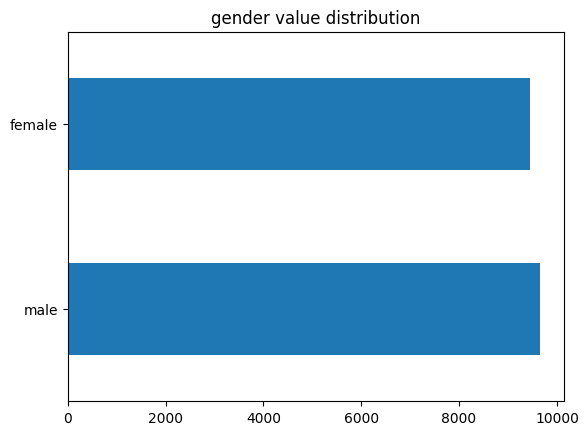

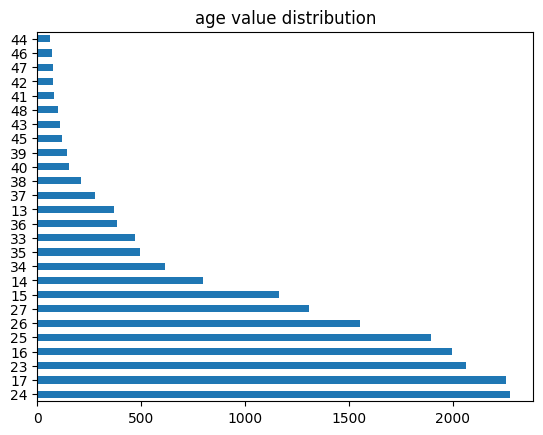

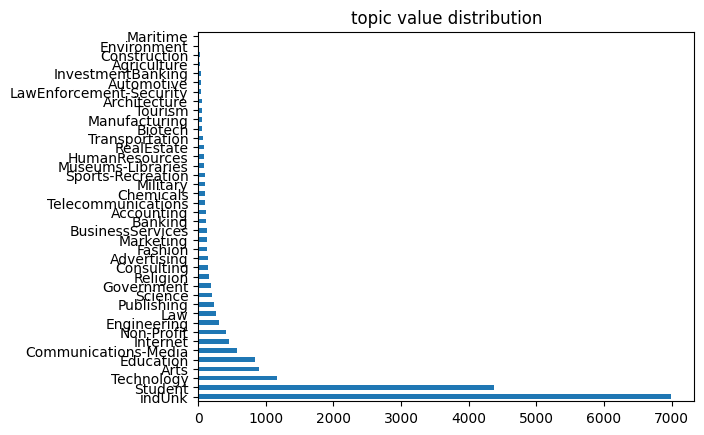

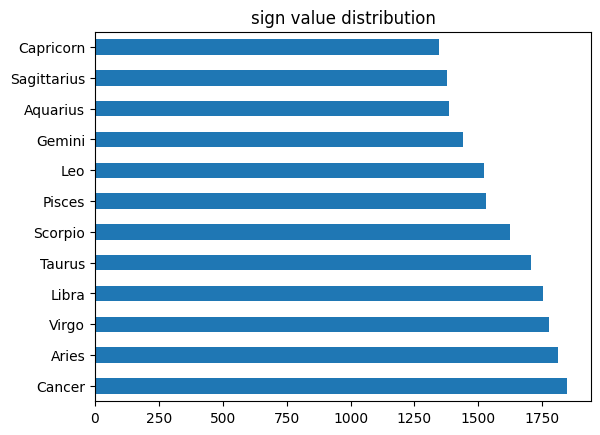

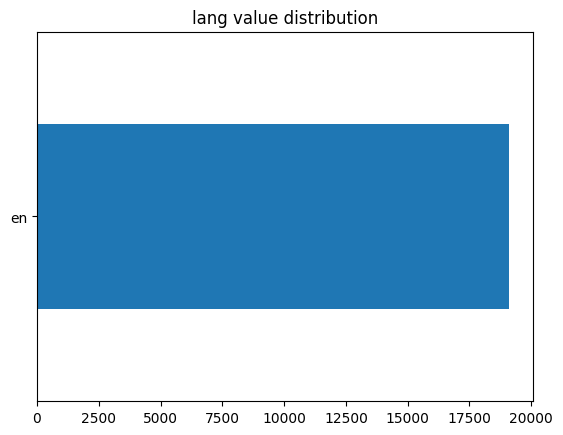

In [ ]:
plt.figure().set_figheight(30)
plt.figure().set_figwidth(10)
for col in ['gender', 'age', 'topic', 'sign','lang']:
    plt.subplots()
    plt.title(col + ' value distribution')
    df2[col].value_counts().plot(kind = 'barh')
plt.show()

* The data seem to have serious 'topic' (target) class imbalance.

* The data also have fraction of samples of other languages compared to english.

In [ ]:
df2.sample(2)

,id,gender,age,topic,sign,date,text,lang
331666,3793386,male,37,InvestmentBanking,Scorpio,14-July-2004,like a democrat flipflops key issues urllink s...,en
375848,3183634,female,14,Student,Gemini,03-May-2004,hahai guess am growing be responsibleoklets se...,en


#3
##3A,3B,3C,3D,3E

###TFIDF

In [ ]:
def eval(model,vect,enc,x,y,tst_splt,seed):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=tst_splt,random_state=seed) #splitting the data
    print('split completed')
    vect.fit(x) #fitting the vectorizer of the x dataset
    xtr_vec = vect.transform(xtrain) #tranforming the train dataset on vectorizer
    xte_vec = vect.transform(xtest) #tranforming the test dataset on vectorizer
    enc.fit(y) # fitting the encoding for y dataset
    ytr_enc = enc.transform(ytrain) # transforming the y train based on the encoding
    yte_enc = enc.transform(ytest) # transforming the y test based on the encoding
    print('fitting model...')
    model.fit(xtr_vec,ytr_enc) #fitting the model
    print('model fit, predicting...')
    tr_y = model.predict(xtr_vec) # predicting against training dataset
    print('model fit, predicting against training data...')
    te_y = model.predict(xte_vec) # predicting against test dataset
    print('model fit, predicting against test data...')
    print('decoding prediction')
    tr_y_denc = enc.inverse_transform(tr_y) #
    te_y_denc = enc.inverse_transform(te_y)
    print('evaluating scores')
    print('--------------------------------\ntraining score') #roc_curve, recall_score, precision_score,
    print(round(accuracy_score(ytr_enc,tr_y),4)*100)
    print(round(recall_score(ytr_enc, tr_y,average='weighted'),4)*100)
    print(round(precision_score(ytr_enc,tr_y,average='weighted'),4)*100)
    print('-------------------------\ntest score')
    print(round(accuracy_score(yte_enc,te_y),4)*100)
    print(round(recall_score(yte_enc,te_y,average='weighted'),4)*100)
    print(round(precision_score(yte_enc,te_y,average='weighted'),4)*100)
    tr_y_dec = pd.DataFrame(tr_y_denc,columns=['pred'])
    te_y_dec = pd.DataFrame(te_y_denc,columns=['pred'])
    tr_y_enc = pd.DataFrame(tr_y,columns=['enc_pred'])
    te_y_enc = pd.DataFrame(te_y,columns=['enc_pred'])
    ytr_enc = pd.DataFrame(ytr_enc,columns=['y_enc'])
    yte_enc = pd.DataFrame(yte_enc,columns=['y_enc'])
    out1 = pd.concat([xtrain,ytrain,tr_y_dec,tr_y_enc,ytr_enc],join='inner',axis = 1)
    out2 = pd.concat([xtest,ytest,te_y_dec,te_y_enc,yte_enc],join = 'inner',axis=1)
    return out1,out2

In [ ]:
y_tr0,y_te0 = eval(MultinomialNB(),
                   TfidfVectorizer(),
                    LabelEncoder(),
                    df2['text'],
                    df2['topic'],
                    0.3,
                    4320
                    )

split completed
fitting model...
model fit, predicting...
model fit, predicting against training data...
model fit, predicting against test data...
decoding prediction
evaluating scores
--------------------------------
training score
37.74
37.74
35.589999999999996
-------------------------
test score
36.67
36.67
27.51


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#4
##4A,4B,4C,4D

###CountVectorizer

In [ ]:
tr_pred,te_pred = eval(xgb.XGBClassifier(objective='softmax',eval_metric=['auc','merror','mlogloss'],seed=4320,min_child_weight=3),
                        CountVectorizer(),
                        LabelEncoder(),
                        df2['text'],
                        df2['topic'],
                        0.3,
                        4320
                        )

split completed
fitting model...
model fit, predicting...
model fit, predicting against training data...
model fit, predicting against test data...
decoding prediction
evaluating scores
--------------------------------
training score
72.43
72.43
81.43
-------------------------
test score
37.31
37.31
28.849999999999998


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tr_pred1,te_pred1 = eval(xgb.XGBClassifier(objective='softmax',eval_metric=['auc','merror','mlogloss'],seed=4320,min_child_weight=3),
                            TfidfVectorizer(),
                            LabelEncoder(),
                            df2['text'],
                            df2['topic'],
                            0.3,
                            4320
                        )

split completed
fitting model...
model fit, predicting...
model fit, predicting against training data...
model fit, predicting against test data...
decoding prediction
evaluating scores
--------------------------------
training score
76.85
76.85
83.27
-------------------------
test score
37.19
37.19
28.910000000000004


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tr_pred2,te_pred2 = eval(RandomForestClassifier(#learning_rate = 0.1,
                                                    n_estimators = 200,
                                                    warm_start = True,
                                                    #validation_fraction = 0.3,
                                                    random_state=4320,
                                                    min_samples_leaf = 3,
                                                    min_samples_split=10
                                                #class_weight = 'balanced'
                                                ),
                            TfidfVectorizer(),
                            LabelEncoder(),
                            df2['text'],
                            df2['topic'],
                            0.3,
                            4320
                            )

split completed
fitting model...
model fit, predicting...
model fit, predicting against training data...
model fit, predicting against test data...
decoding prediction
evaluating scores
--------------------------------
training score
52.52
52.52
54.730000000000004
-------------------------
test score
37.65
37.65
26.229999999999997


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ran

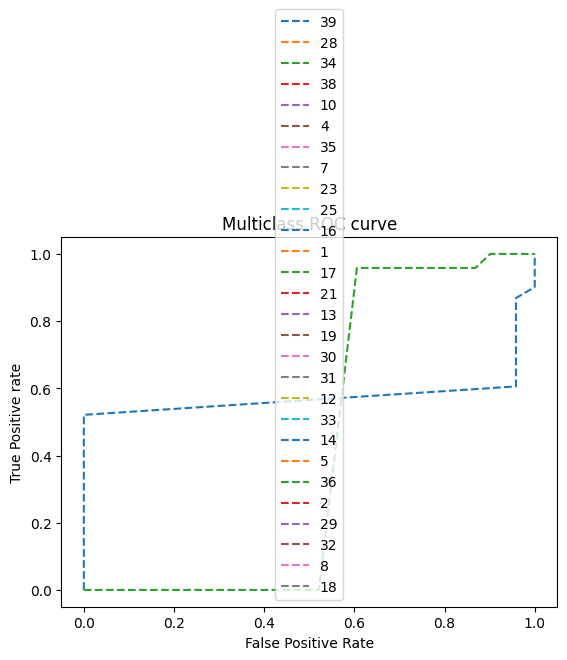

In [ ]:
fpr = {}
tpr = {}
thresh ={}
plt.subplots()
#for col in ['tr_pred2']:
for i in tr_pred2['y_enc'].unique():
    fpr[i], tpr[i], thresh[i] = roc_curve(tr_pred2['enc_pred'],tr_pred2['y_enc'],pos_label=i)
    plt.plot(fpr[i], tpr[i], linestyle='--' ,label = i)
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

#5

* 5A - TFIdF vectorizer perfromed better

* 5B - Random forest thought it is overfit, its training accuracy is very high. some tuning can be performed to improve the performance.

* 5C - numbers of trees seems to be very important parameter

* 5D - roc_curve for classification which also gives insights on precision along with accuracy.

In [ ]:
%%shell
jupyter nbconvert --to html //'/content/drive/MyDrive/AI-ML/Natural Language Processing/Mini Project/StatNPL_ProjectA.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/AI-ML/Natural Language Processing/Mini Project/StatNPL_ProjectA.ipynb to html
[NbConvertApp] Writing 904932 bytes to /content/drive/MyDrive/AI-ML/Natural Language Processing/Mini Project/StatNPL_ProjectA.html
